<a href="https://colab.research.google.com/github/robd123/AML/blob/main/CV/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from time import time

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from datetime import datetime

In [2]:
which = 3
out_file = 'fashion'
print( 'input data: ', out_file )
class_names = [ 't-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot' ] 
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
channels = 1  #gray=1; rgb=3

input data:  fashion
4423680/4422102 [==============================] - 0s 0us/step


first 25 training images (as gray data)


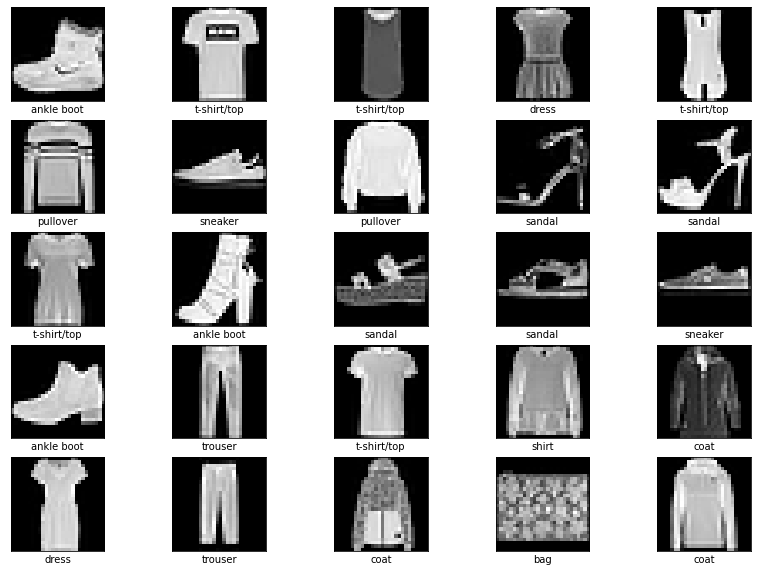

In [4]:
print( 'first 25 training images (as gray data)' )
plt.figure( figsize=(14, 10), num='first 25 training images' )
plt.title( 'first 25 training images (shown as gray data' )
for i in range( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.xlabel( class_names[int(train_labels[i])] )
plt.show()

[  0   0   0   0   0   0   0   2   0  99 218 202 211 205 220 205 215 205
 229 152   0   0   0   0   0   0   0   0]


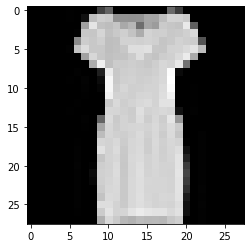

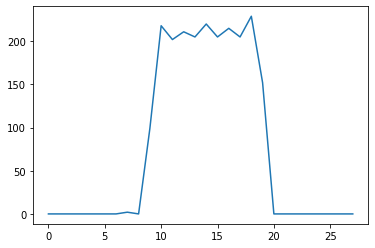

[  0   0   0   0   0   0   0   0   0  45 145 191  20  65  68  40 148 159
  79  60   0   0   0   0   0   0   0   0]


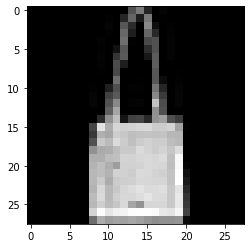

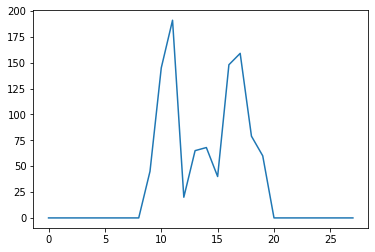

In [5]:
if channels == 1:  # 1 == gray
    i = 20  #image 20
    rows = len( train_images[i] )
    line = train_images[i][rows//2]
    print( line )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.show()
    plt.plot( line )
    plt.show()

    i = 200  #image 200
    rows = len( train_images[i] )
    line = train_images[i][rows//2]
    print( line )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.show()
    plt.plot( line )
    plt.show()

first 25 training images (as binary data)


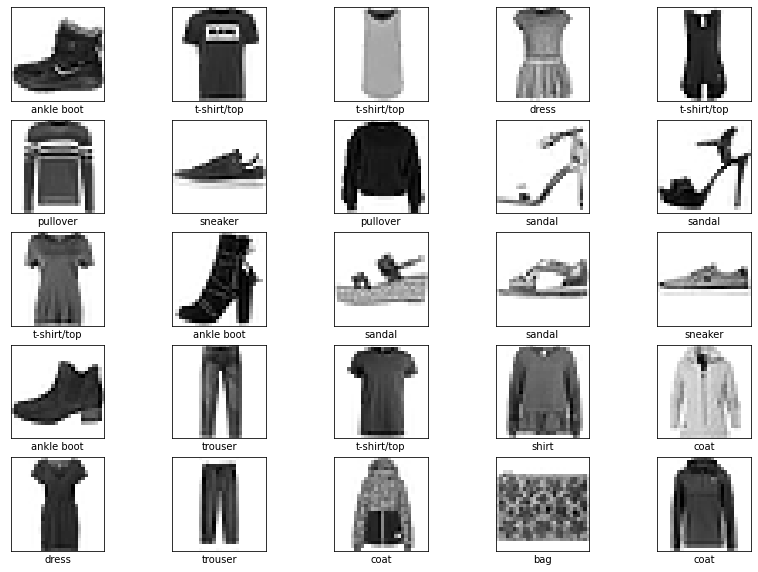

In [6]:
#show first 25 training images (as binary data)
print( 'first 25 training images (as binary data)' )
plt.figure( figsize=(14, 10), num='first 25 training images' )
plt.title( 'first 25 training images (shown as binary data' )
for i in range( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( train_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    plt.xlabel( class_names[int(train_labels[i])] )
plt.show()


**TODO #1 - Use a Randomized 80/20 Split for Training and Test Data**

In [7]:
X = np.concatenate((train_images, test_images), axis = 0)
Y = np.concatenate((train_labels, test_labels), axis = 0)

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

#Keep these since they are used later.  Reassign them to the new randomly split data
train_images = x_train
train_labels = y_train
test_images = x_test
test_labels = y_test

print( "# of training images and their size:", train_images.shape       )
print( "# of training labels and their size:", train_labels.shape, "\n" )

print( "# of testing images and their size:",  test_images.shape        )
print( "# of testing labels and their size:",  test_labels.shape        )

(70000, 28, 28)
(70000,)
# of training images and their size: (56000, 28, 28)
# of training labels and their size: (56000,) 

# of testing images and their size: (14000, 28, 28)
# of testing labels and their size: (14000,)


I switched this one to a bar graph because I couldn't get the x-axis tick labels to align properly with the bars on plt.hist()

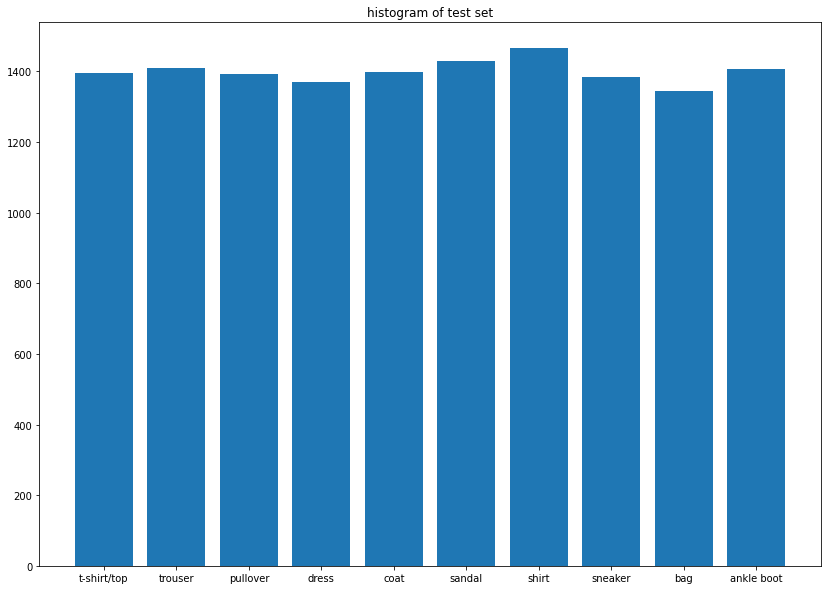

In [16]:
test_hist = np.histogram( test_labels, len(class_names) )[0]
plt.figure( figsize=(14,10) )
plt.title( 'histogram of test set' )
plt.bar( class_names,test_hist )
plt.show()


[5602 5670 5561 5654 5577 5530 5644 5625 5571 5566]


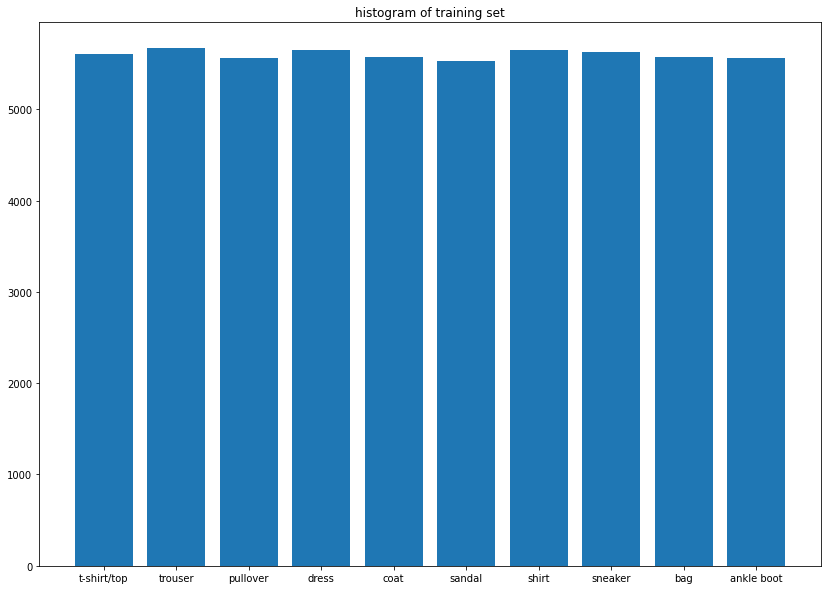

In [ ]:
h = np.histogram( train_labels, len(class_names) )[0]
print( h )
plt.figure( figsize=(14,10) )
plt.title( 'histogram of training set' )
plt.bar( class_names, h )
plt.show()

[1395 1410 1394 1371 1397 1430 1466 1384 1345 1408]


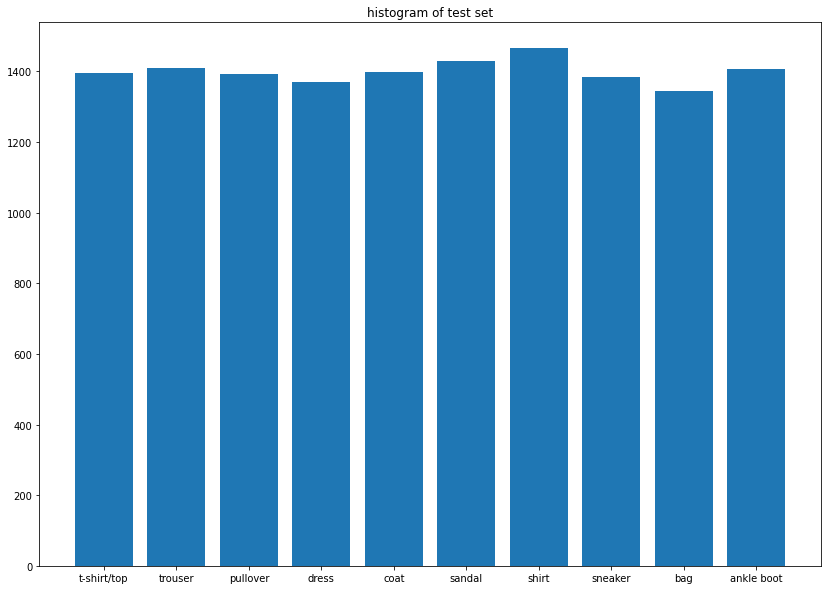

In [17]:
h = np.histogram( test_labels, len(class_names) )[0]
print( h )
plt.figure( figsize=(14,10) )
plt.title( 'histogram of test set' )
plt.bar( class_names, h )
plt.show()


In [9]:
img_rows    = x_train.shape[1]
img_cols    = x_train.shape[2]
input_shape = (img_rows, img_cols, channels)    #channels = 1 for gray (3 for color/rgb)

t1 = np.min( x_train )
t2 = np.min( x_test )
mn = np.min( [t1, t2] )

t1 = np.max( x_train )
t2 = np.max( x_test )
mx = np.min( [t1, t2] )

print( 'rows =', img_rows )
print( 'cols =', img_cols )
print( 'channels =', channels, '\n' )
print( 'min =', mn )
print( 'max =', mx )

rows = 28
cols = 28
channels = 1 

min = 0
max = 255


In [10]:
print( '# of training images: ', len(x_train) )
print( 'shape before: ', x_train.shape )

#prep training images
x_train = x_train.reshape( x_train.shape[0], img_rows, img_cols, channels )
x_train = x_train.astype( 'float32' )

assert mx == 255, "check range of data values"
x_train /= 255.0  #normalize

print( 'shape after: ', x_train.shape )

"""### prep testing"""

print( '# of testing images: ', len(x_test) )
print( 'shape before: ', x_test.shape )


# of training images:  56000
shape before:  (56000, 28, 28)
shape after:  (56000, 28, 28, 1)
# of testing images:  14000
shape before:  (14000, 28, 28)


In [11]:
#prep testing images
x_test = x_test.reshape( x_test.shape[0], img_rows, img_cols, channels )
x_test = x_test.astype( 'float32' )
assert mx == 255, "check range of data values"
x_test /= 255.0  #normalize

In [14]:
print( 'create new model' )
print( 'input shape: ', input_shape )
model = keras.Sequential()
model.add( keras.layers.Flatten( input_shape=input_shape ) )
model.add( keras.layers.Dense( 128,              activation='relu'    ) )
model.add( keras.layers.Dense( len(class_names), activation='softmax' ) )
model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

model.summary()

create new model
input shape:  (28, 28, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


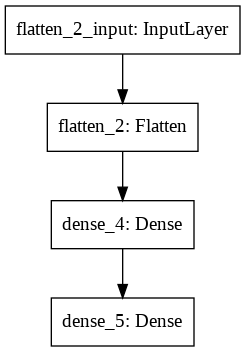

In [18]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96 )


In [19]:
print( '\ntesting all test images (before any training) ...' )
test_loss, test_acc = model.evaluate( x_test, y_test )
print( "loss=" + str(test_loss) + ", test acc=" + str(test_acc) + "\n" )

# Define the Keras TensorBoard callback.
logdir = "logs/fit/" + datetime.now().strftime( "%Y%m%d-%H%M%S" )
tensorboard_callback = keras.callbacks.TensorBoard( log_dir=logdir )


testing all test images (before any training) ...
438/438 [==============================] - 1s 1ms/step - loss: 2.4486 - accuracy: 0.1217
loss=2.454202890396118, test acc=0.11878571659326553



**TODO #2 - Train Model, Use Test Data for Validation**

---
Validation data does not affect the training of the model, it just provides metrics, so the test set can be used for validation.


In [21]:
print( "training ... \n" )
ep = 100
start = time()
h = model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback],  validation_data=(x_test, y_test))
elapsed_training_time = time() - start

training ... 

Epoch 1/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1971 - accuracy: 0.9269 - val_loss: 0.3362 - val_accuracy: 0.8866
Epoch 2/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1941 - accuracy: 0.9280 - val_loss: 0.3503 - val_accuracy: 0.8841
Epoch 3/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1878 - accuracy: 0.9292 - val_loss: 0.3295 - val_accuracy: 0.8881
Epoch 4/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1808 - accuracy: 0.9315 - val_loss: 0.3377 - val_accuracy: 0.8900
Epoch 5/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1777 - accuracy: 0.9331 - val_loss: 0.3563 - val_accuracy: 0.8851
Epoch 6/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1746 - accuracy: 0.9349 - val_loss: 0.3454 - val_accuracy: 0.8869
Epoch 7/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1684 - accuracy: 0.9370 - val_loss: 

In [22]:
model.save('fashion_shallow.h5')

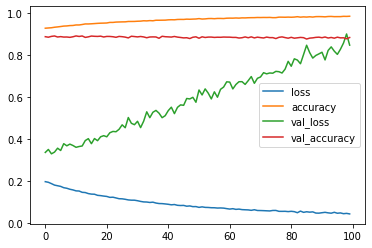

In [23]:
pd.DataFrame(model.history.history).plot()

In [24]:
print(elapsed_training_time)

368.9987735748291


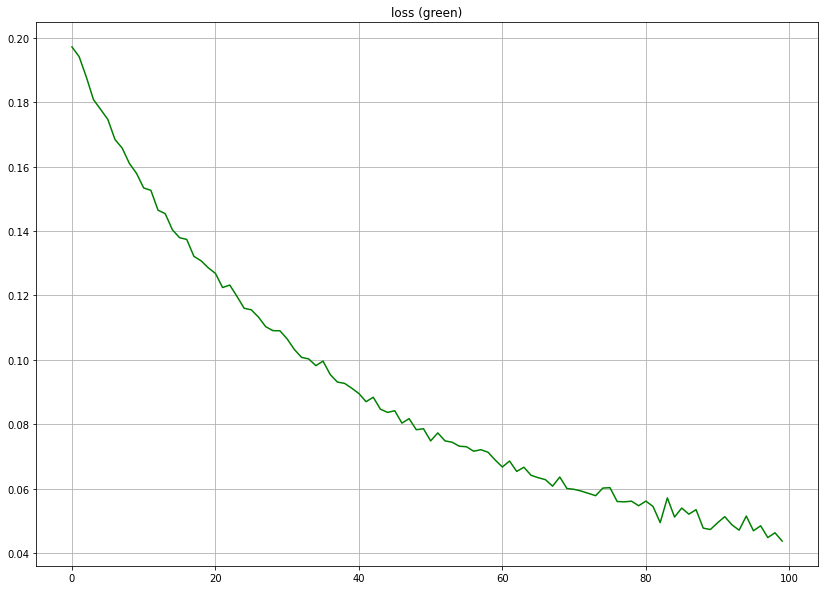

loss: [0.19713762402534485, 0.19411371648311615, 0.18780729174613953, 0.1807701140642166, 0.17771779000759125, 0.17462700605392456, 0.16838482022285461, 0.16573597490787506, 0.1609869748353958, 0.157883882522583, 0.15334926545619965, 0.1526203751564026, 0.14645110070705414, 0.1453714668750763, 0.14038632810115814, 0.1379077434539795, 0.13737991452217102, 0.13211455941200256, 0.13074302673339844, 0.12856778502464294, 0.12683503329753876, 0.1224365308880806, 0.12320739775896072, 0.11971016228199005, 0.11601138114929199, 0.11552087217569351, 0.11326708644628525, 0.11030595749616623, 0.10907095670700073, 0.10900785773992538, 0.10648706555366516, 0.1032223328948021, 0.10077598690986633, 0.10028014332056046, 0.09819341450929642, 0.09960736334323883, 0.09544520080089569, 0.09309898316860199, 0.09270099550485611, 0.09119917452335358, 0.08953657746315002, 0.08700646460056305, 0.08838971704244614, 0.08468425273895264, 0.08368074893951416, 0.08419923484325409, 0.08035559952259064, 0.0817468091845

In [25]:
#report and plot loss
plt.figure( figsize=(14,10) )
plt.grid();  plt.title( 'loss (green)' );       
plt.plot( h.history['loss'],     'g' ); 
plt.show()
print( "loss:", h.history["loss"] )

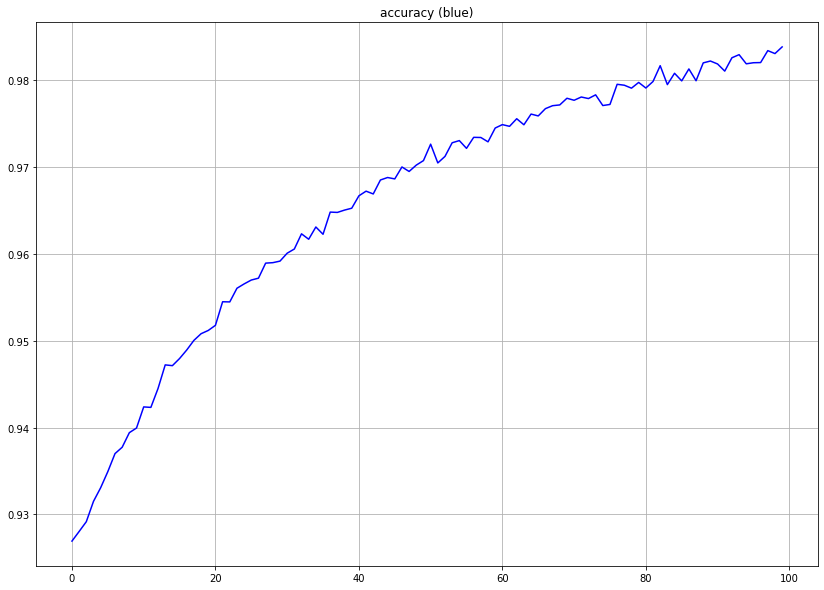

accuracy: [0.9269285798072815, 0.9280357360839844, 0.9291607141494751, 0.9315000176429749, 0.9330714344978333, 0.9349285960197449, 0.9369999766349792, 0.9377321600914001, 0.9394106864929199, 0.9399464130401611, 0.9423750042915344, 0.9423214197158813, 0.9445000290870667, 0.9472143054008484, 0.9471250176429749, 0.9479464292526245, 0.9489285945892334, 0.9500356912612915, 0.9508035778999329, 0.9511785507202148, 0.9517678618431091, 0.9544821381568909, 0.9544642567634583, 0.9560357332229614, 0.9565356969833374, 0.9569821357727051, 0.9571964144706726, 0.9589285850524902, 0.9589821696281433, 0.9591606855392456, 0.9600714445114136, 0.9605535864830017, 0.9623035788536072, 0.9616785645484924, 0.9630892872810364, 0.9622499942779541, 0.9648035764694214, 0.9647678732872009, 0.9650357365608215, 0.9652500152587891, 0.9666785597801208, 0.9672142863273621, 0.9668928384780884, 0.968500018119812, 0.9687857031822205, 0.968625009059906, 0.9700000286102295, 0.9694821238517761, 0.970214307308197, 0.9707321524

In [26]:
#report accuracy
plt.figure( figsize=(14,10) )
plt.grid();  plt.title( 'accuracy (blue)'   );
plt.plot( h.history['accuracy'], 'b' ); 
plt.show()
print( "accuracy:", h.history["accuracy"] )

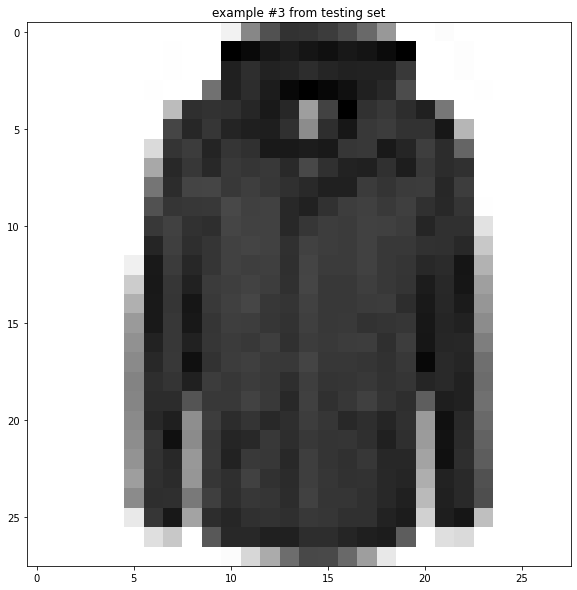

In [27]:
# show a sample test image
plt.figure( figsize=(14,10) )
plt.title( 'example #' + str(which) + ' from testing set' )
plt.imshow( test_images[which], cmap=plt.cm.binary, interpolation='nearest' )
plt.grid( False )
plt.draw()
plt.show()

In [28]:
#show sample prediction
print( 'actual class for test #', which, ':', test_labels[which], class_names[test_labels[which]] )
#get the image from the test dataset
img = x_test[ which ]
#add the image to a batch where it's the only member
img = ( np.expand_dims(img, 0) )
prediction = model.predict( img )
print( 'prediction vector for test image #' + str(which) + ':', prediction[0] )
print( 'subscript of maximal prediction:', np.argmax(prediction[0]), class_names[np.argmax(prediction[0])] )

actual class for test # 3 : 4 coat
prediction vector for test image #3: [1.48515057e-13 1.17901327e-12 1.13485344e-01 1.13597025e-05
 8.86503279e-01 3.84259627e-13 1.08938899e-07 1.84246559e-11
 1.62747462e-19 4.57787267e-22]
subscript of maximal prediction: 4 coat


# First Prediction

first 120 test images (errors in parens)


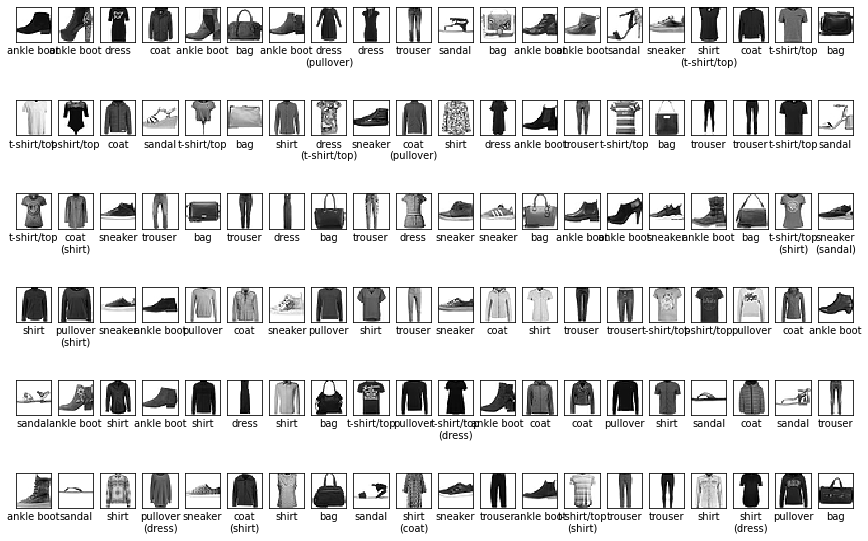

In [29]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = x_test[i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( test_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

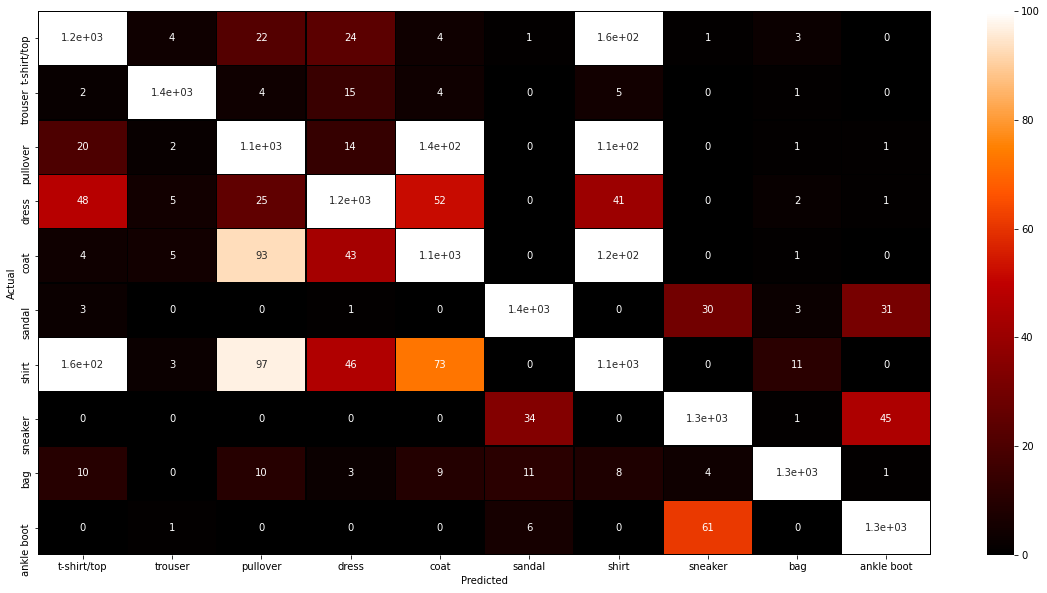

In [30]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=class_names, yticklabels=class_names, vmax=100, vmin=0, linewidths=.3, linecolor='black')
heatmap.set(xlabel="Predicted", ylabel = "Actual")

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1395
           1       0.99      0.98      0.98      1410
           2       0.82      0.80      0.81      1394
           3       0.89      0.87      0.88      1371
           4       0.80      0.81      0.81      1397
           5       0.96      0.95      0.96      1430
           6       0.70      0.73      0.72      1466
           7       0.93      0.94      0.94      1384
           8       0.98      0.96      0.97      1345
           9       0.94      0.95      0.95      1408

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



**TODO #3 - Create Lists of Good and Bad Predictions**

In [32]:
bad = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] != y_test[i]]
good = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] == y_test[i]]
print(len(good))
print(len(bad))

12356
1644


[251  20 251 146 277  52 449  96  23  79]


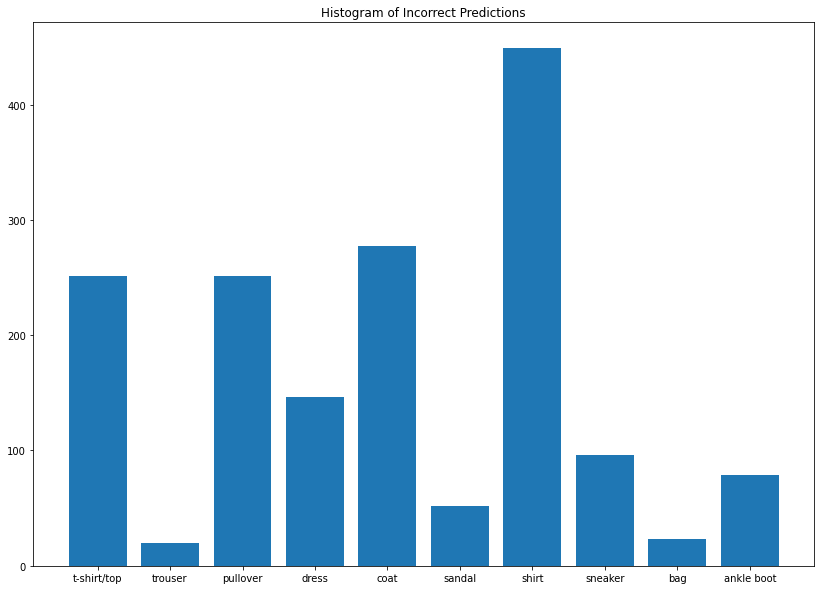

In [33]:
h_bad = np.histogram( bad, len(class_names) )[0]
print( h_bad )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Incorrect Predictions' )
plt.bar( class_names, h_bad )
plt.show()

[1172 1379 1110 1197 1131 1362 1072 1304 1289 1340]


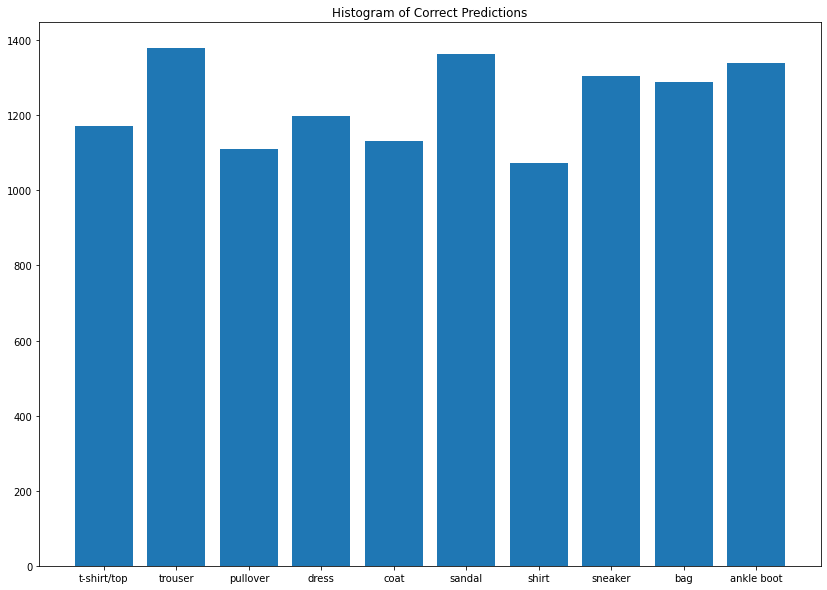

In [34]:
h_good = np.histogram( good, len(class_names) )[0]
print( h_good )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Correct Predictions' )
plt.bar( class_names, h_good )
plt.show()

[17.63879128601546, 1.4295925661186561, 18.442321822189566, 10.871183916604616, 19.673295454545453, 3.6775106082036775, 29.520052596975674, 6.857142857142857, 1.7530487804878048, 5.567300916138126]


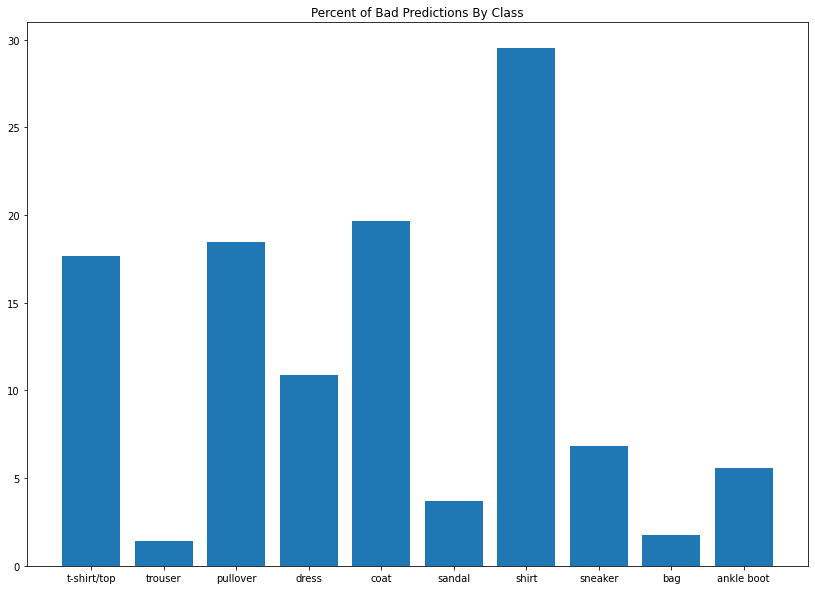

In [35]:
pct_bad = [(h_bad[i]*100/(h_bad[i] +  h_good[i])) for i in range(len(h_good))]
print(pct_bad)
plt.figure( figsize=(14,10) )
plt.title( 'Percent of Bad Predictions By Class' )
plt.bar( class_names, pct_bad )
plt.show()

# Increase Noise

**TODO #4 - Create Noisy Test Data**

---

Create noisy test data. Noise is added 20 times iteratively, resulting in 21 sets of test data with increasing amounts of noise.  These sets will be represented as noise levels 0-20 with noise level 0 being the original noiseless test data.  

In [36]:
np.random.seed(17)

zeroes = np.zeros((len(x_test), img_rows, img_cols, 1))
ones = zeroes + 1

noisy_test_sets = list()
noisy_display_sets = list()

#Base noiseless data
noisy_test_sets.append(x_test)
noisy_x_test = x_test

for i in range(0, 20):

  noise = np.random.normal(0, .1, x_test.shape)
  noisy_x_test = noisy_x_test + noise
  noisy_x_test = np.minimum(noisy_x_test, ones)
  noisy_x_test = np.maximum(noisy_x_test, zeroes)

  noisy_test_sets.append(noisy_x_test)
  # Reshape and multiply by 255 to get images for display
  noisy_display_sets.append(noisy_x_test.reshape(len(x_test), img_rows, img_cols) * 255)



In [37]:
noise_accuracy_scores = list()
noisy_predictions = list()
noise_classification_data = list()

for test_set in noisy_test_sets:
  pred = np.argmax(model.predict(test_set), axis=-1)
  noise_accuracy_scores.append(accuracy_score(y_test, pred))
  noise_classification_data.append(classification_report(y_test, pred))
  noisy_predictions.append(pred)


In [38]:
print(noise_accuracy_scores)

[0.8825714285714286, 0.8257857142857142, 0.7527142857142857, 0.6932142857142857, 0.6368571428571429, 0.5864285714285714, 0.5471428571428572, 0.5060714285714286, 0.4717142857142857, 0.4355, 0.40435714285714286, 0.3767857142857143, 0.35314285714285715, 0.3289285714285714, 0.30864285714285716, 0.2929285714285714, 0.2749285714285714, 0.2575, 0.24464285714285713, 0.23192857142857143, 0.22021428571428572]


**Display Noisy Images at the Noise Level 9**

---

Without noise, this set is more difficult to predict than the digits dataset, this is likely due to the types being more difficult to distinguish from each other in general (ankle boots and sneakers look pretty alike in gray).  At a middle level of noise, most of the images are still relatively easy to distinguish from each other.  The images that the model fails to classify are not predicted as a similar class, see a sneaker being classified as a pullover (img 16).

first 120 test images (errors in parens)


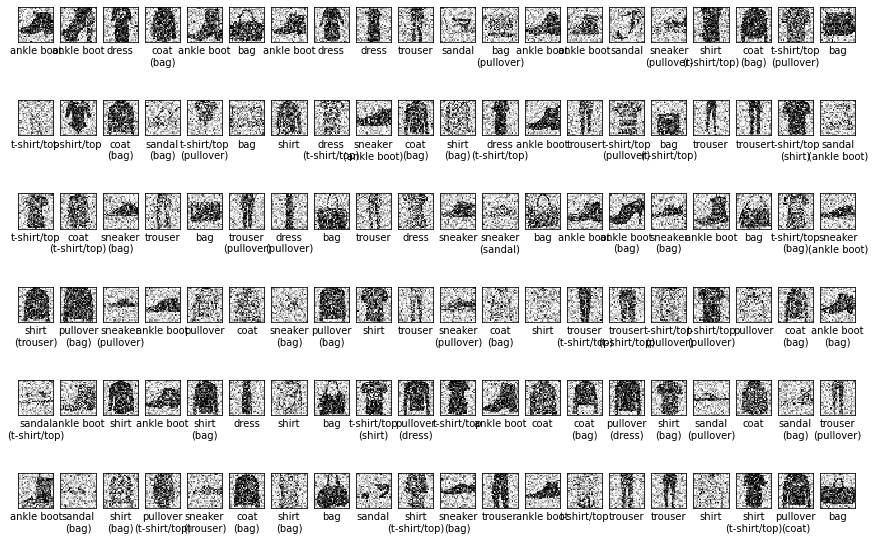

In [39]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = noisy_test_sets[9][i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( noisy_display_sets[9][i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

**Display Noisy Images at the Maximum Noise Level**

---

Most of these images just look like noisy blobs.  I think the predictive model is better at classifying them than I am. 

first 120 test images (errors in parens)


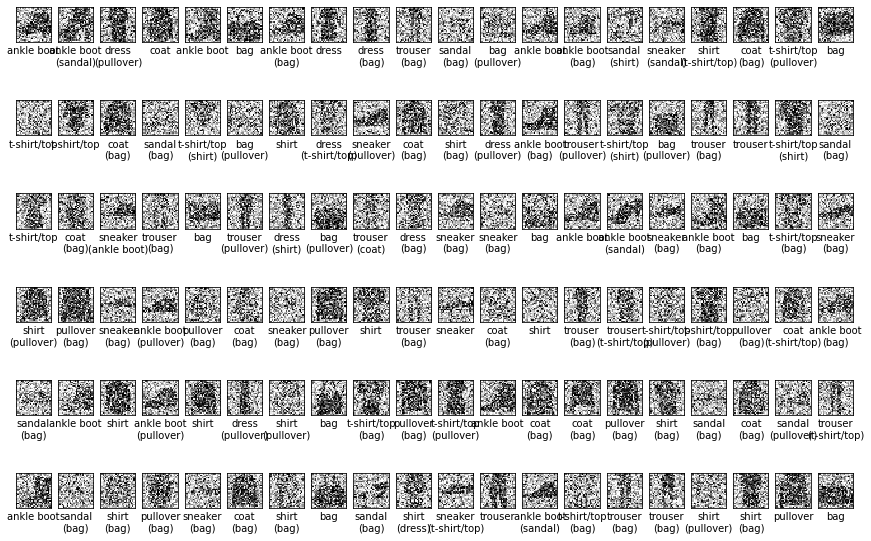

In [40]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = noisy_test_sets[20][i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( noisy_display_sets[19][i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

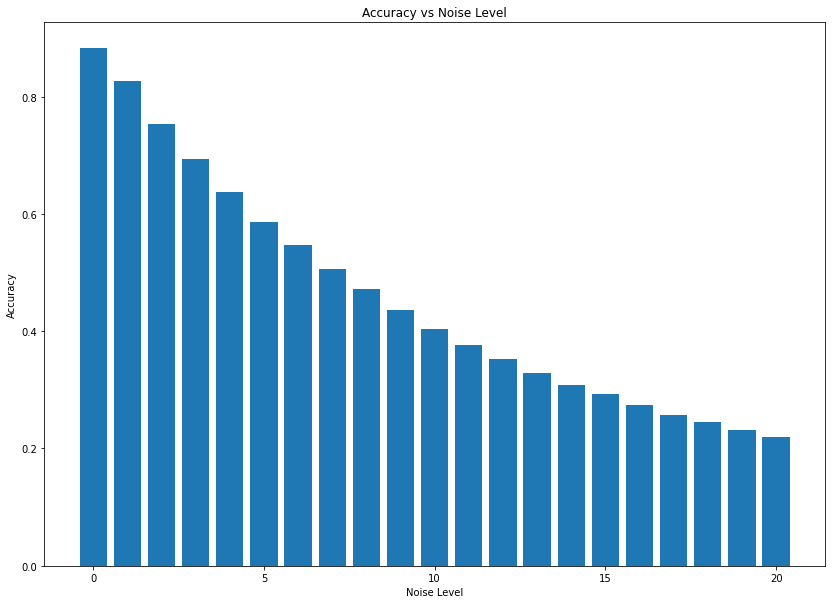

In [41]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 21), noise_accuracy_scores )
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()

# Increase Depth of Neural Network

---

Problem #5 in the assignment

In [42]:
deep_model = keras.Sequential()
deep_model.add( keras.layers.Flatten( input_shape=input_shape) )
deep_model.add( keras.layers.Dense( 128, activation='relu') )
deep_model.add( keras.layers.Dense( 64, activation='relu') )
deep_model.add( keras.layers.Dense( 32, activation='relu') )
deep_model.add( keras.layers.Dense( len(class_names), activation='softmax' ) )
deep_model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

In [43]:
ep = 100
start_2 = time()
h = deep_model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback], validation_data=(x_test, y_test))  #randomizes by default
elapsed_training_time_deep = time() - start_2

Epoch 1/100
1750/1750 [==============================] - 5s 2ms/step - loss: 0.6761 - accuracy: 0.7664 - val_loss: 0.4054 - val_accuracy: 0.8531
Epoch 2/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.3843 - accuracy: 0.8609 - val_loss: 0.3525 - val_accuracy: 0.8688
Epoch 3/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.3366 - accuracy: 0.8774 - val_loss: 0.3589 - val_accuracy: 0.8649
Epoch 4/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.3137 - accuracy: 0.8833 - val_loss: 0.3417 - val_accuracy: 0.8757
Epoch 5/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2912 - accuracy: 0.8931 - val_loss: 0.3363 - val_accuracy: 0.8750
Epoch 6/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.8952 - val_loss: 0.3391 - val_accuracy: 0.8717
Epoch 7/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2695 - accuracy: 0.8994 - val_loss: 0.3338 - val_ac

In [47]:
model.save('fashion_deep.h5')

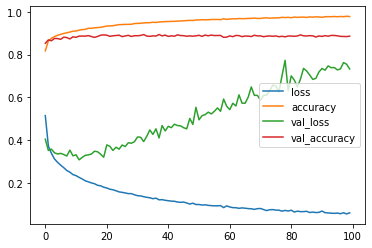

In [48]:
pd.DataFrame(deep_model.history.history).plot()

In [49]:
print(elapsed_training_time_deep)

394.4627947807312


In [50]:
noise_accuracy_scores_deep = list()
noisy_predictions_deep = list()
noisy_classification_data_deep = list()

for test_set in noisy_test_sets:
  pred = np.argmax(deep_model.predict(test_set), axis=-1)
  noise_accuracy_scores_deep.append(accuracy_score(y_test, pred))
  noisy_classification_data_deep.append(classification_report(y_test, pred))
  noisy_predictions_deep.append(pred)

In [51]:
print(noisy_classification_data_deep[0])

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1395
           1       0.99      0.97      0.98      1410
           2       0.77      0.86      0.81      1394
           3       0.87      0.89      0.88      1371
           4       0.83      0.81      0.82      1397
           5       0.97      0.96      0.97      1430
           6       0.77      0.65      0.71      1466
           7       0.96      0.93      0.94      1384
           8       0.98      0.97      0.97      1345
           9       0.93      0.97      0.95      1408

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000



In [52]:
print(noise_accuracy_scores_deep)

[0.8863571428571428, 0.8395, 0.766, 0.6962142857142857, 0.6321428571428571, 0.5819285714285715, 0.5448571428571428, 0.507, 0.4687857142857143, 0.4426428571428571, 0.4185, 0.39521428571428574, 0.37785714285714284, 0.36042857142857143, 0.3417142857142857, 0.32542857142857146, 0.3087142857142857, 0.2935714285714286, 0.27614285714285713, 0.2626428571428571, 0.25057142857142856]


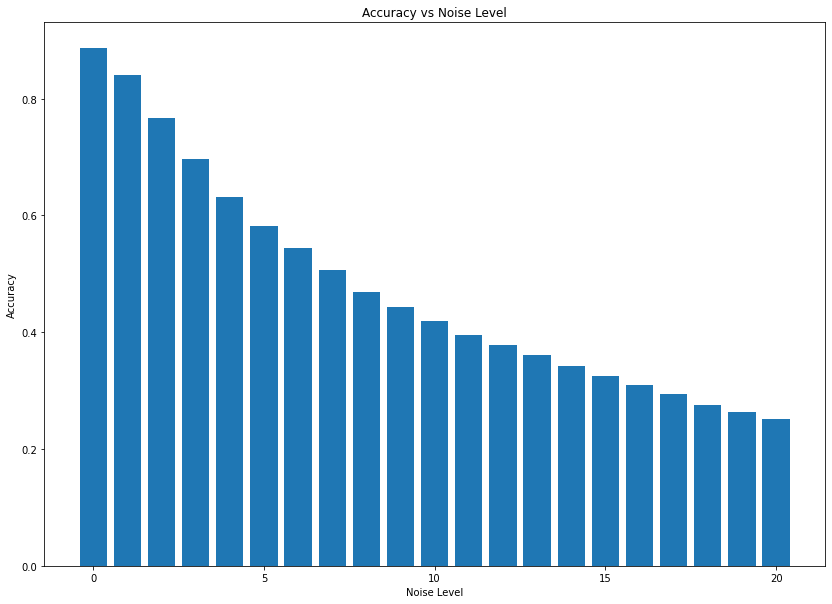

In [53]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 21), noise_accuracy_scores_deep )
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()

In [56]:
accuracy_df = pd.DataFrame(noise_accuracy_scores_deep)
accuracy_df.to_csv('fashion_accuracy.csv')

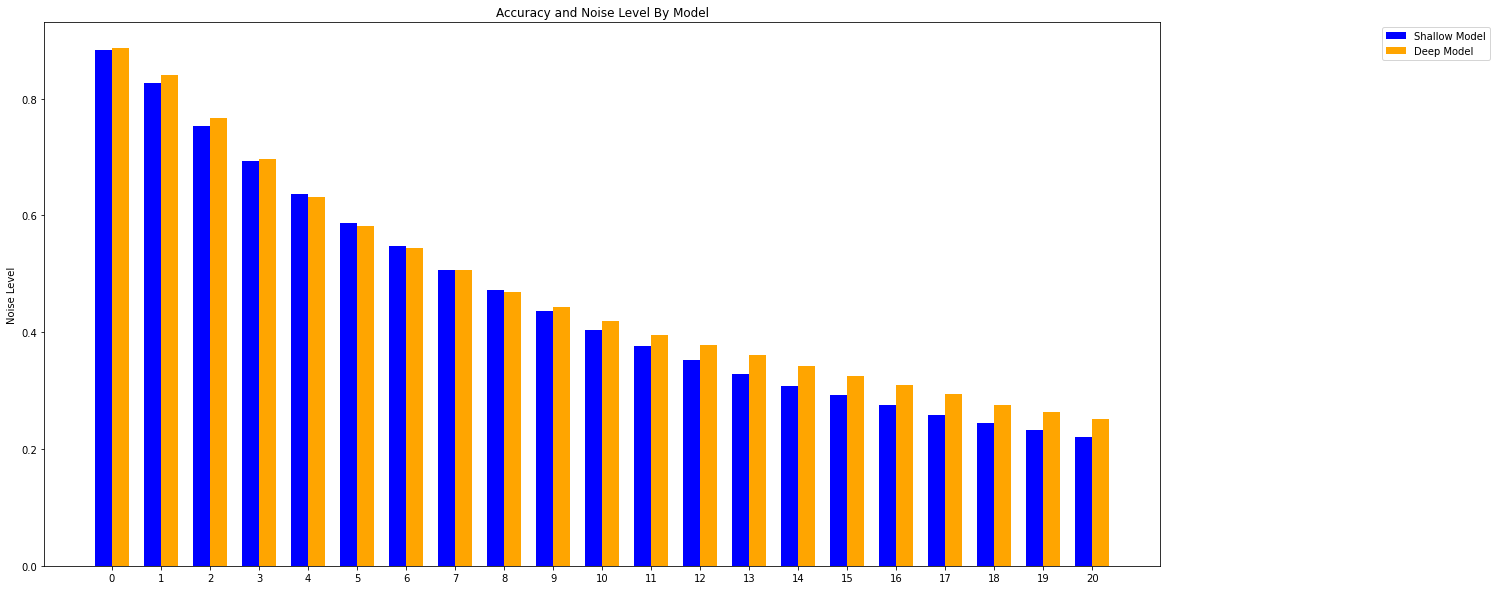

In [54]:
labels = np.arange(0, 21)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, noise_accuracy_scores, width, label='Shallow Model', color='blue')
rects2 = ax.bar(x + width/2, noise_accuracy_scores_deep, width, label='Deep Model', color='orange')

ax.set_ylabel('Accuracy')
ax.set_ylabel('Noise Level')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')
plt.title('Accuracy and Noise Level By Model')
plt.show()